### 1. Importar las bibliotecas requeridas

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns

### 2. Importar la bd preprocesada y lista df1

In [2]:
df = pd.read_csv('bd titanic mineros 1.csv', encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               891 non-null    int64  
 1   Sobrevivió       891 non-null    int64  
 2   Clase            891 non-null    int64  
 3   Sexo             891 non-null    object 
 4   Edad             714 non-null    float64
 5   HerEsp           891 non-null    int64  
 6   PadHij           891 non-null    int64  
 7   Precio           891 non-null    float64
 8   Embarcó          891 non-null    object 
 9   GruposEdad       714 non-null    object 
 10  HerEsp + PadHij  891 non-null    int64  
 11  SolAcom          891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [4]:
df.head(3)

,Id,Sobrevivió,Clase,Sexo,Edad,HerEsp,PadHij,Precio,Embarcó,GruposEdad,HerEsp + PadHij,SolAcom
0,1,0,3,male,22.0,1,0,7.2500,S,Adulto jóven,1,Acompañado
1,2,1,1,female,38.0,1,0,71.2833,C,Adulto,1,Acompañado
2,3,1,3,female,26.0,0,0,7.9250,S,Adulto jóven,0,Solo


### 3. Correlación de todas las variables

In [5]:
# df3 significa el dataframe 3 y esta es la que se ocupará para hacer el análisis de correlación.
df3 = df.drop(columns=['Id', 'GruposEdad', 'HerEsp', 'PadHij', 'Precio', 'Embarcó', 'SolAcom'])

In [6]:
df3.head(3)

,Sobrevivió,Clase,Sexo,Edad,HerEsp + PadHij
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0


#### Explorar la columna HerEsp + PadHij.

In [7]:
# solo para conocer las opciones únicas de datos que tenemos dentro de la columna HerEsp + PadHij.
print(df3['HerEsp + PadHij'].unique())
print(df3['HerEsp + PadHij'].value_counts())

[ 1  0  4  2  6  5  3  7 10]
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: HerEsp + PadHij, dtype: int64


In [8]:
# únicamente para fines de este ejercicio de correlación, esta columna será llamada SolAcom.
df3.rename(columns={'HerEsp + PadHij':'SolAcom'}, inplace=True)

#### Transformar la variable categórica.

In [9]:
df3['Sexo'].unique()

array(['male', 'female'], dtype=object)

In [10]:
df3['Sexo'] = df3['Sexo'].map({'male': 0.0, 'female': 1.0})

#### Visualizar el gráfico de correlación.

In [11]:
df3.head(3)

,Sobrevivió,Clase,Sexo,Edad,SolAcom
0,0,3,0.0,22.0,1
1,1,1,1.0,38.0,1
2,1,3,1.0,26.0,0


<AxesSubplot:>

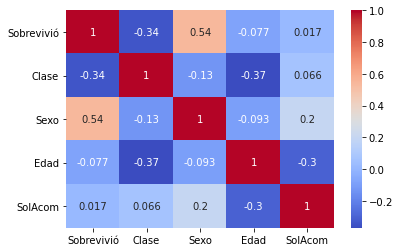

In [12]:
sns.heatmap(df3.corr(), annot = True, cmap = 'coolwarm')